In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})


## 1.1 Introducing time series

**Time series**    
A time series is a set of data points ordered in time.

The data is equally spaced in time, meaning that it was recorded at every hour,
minute, month, or quarter.     
Typically examples of time series include the closing
value of a stock, a household's electricity consumption,    
or the temperature outside.

In [3]:
file_path = "./datasets/jj.csv"
df = pd.read_csv(file_path, parse_dates=[0])
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


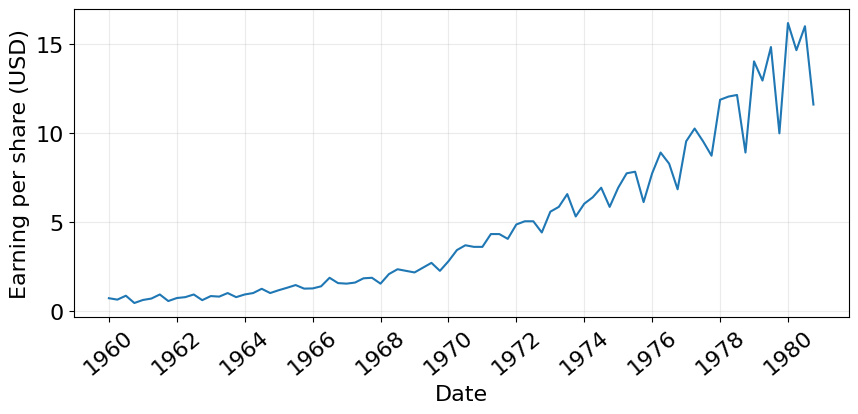

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(df["date"], df["data"])

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator(base=2)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Date")
ax.set_ylabel("Earning per share (USD)")

for label in ax.get_xticklabels():
  label.set_rotation(40)
  # label.set_horizontalalignment('right')
plt.show(fig)

**Time series decomposition**   
Time series decomposition is a process by which we separate a time series   
into its components: trend seasonality, and residuals.     

The trend represents the slow-moving changes in a time series.    
It is responsible for making the series gradually increase or decrease over time.     

The seasonality component represents the seasonal pattern in the series.    
The cycles occur repeatedly over a fixed period of time.     

The residuals represent the behavior that cannot be explained by the trend    
and seasonality components.    
They corresponds to random errors, also termed white noise.

See [Cleveland et al., 1990 - STL: A Seasonal-Trend Decomposition Procedure Based on Loess
](http://www.nniiem.ru/file/news/2016/stl-statistical-model.pdf)     
for theoretical background of STL class in statsmodels

The basic idea is to decompose a time series $Y_t$ as a 
$$
\begin{align*}
  Y_t = T_t + S_t + R_t 
\end{align*}
$$
where $T_t$ is the trend component, $S_t$ is the seasonal component, 
and $R_t$ is the residual component.

In [5]:
advanced_decomposition = STL(df["data"], period=4).fit()
advanced_decomposition

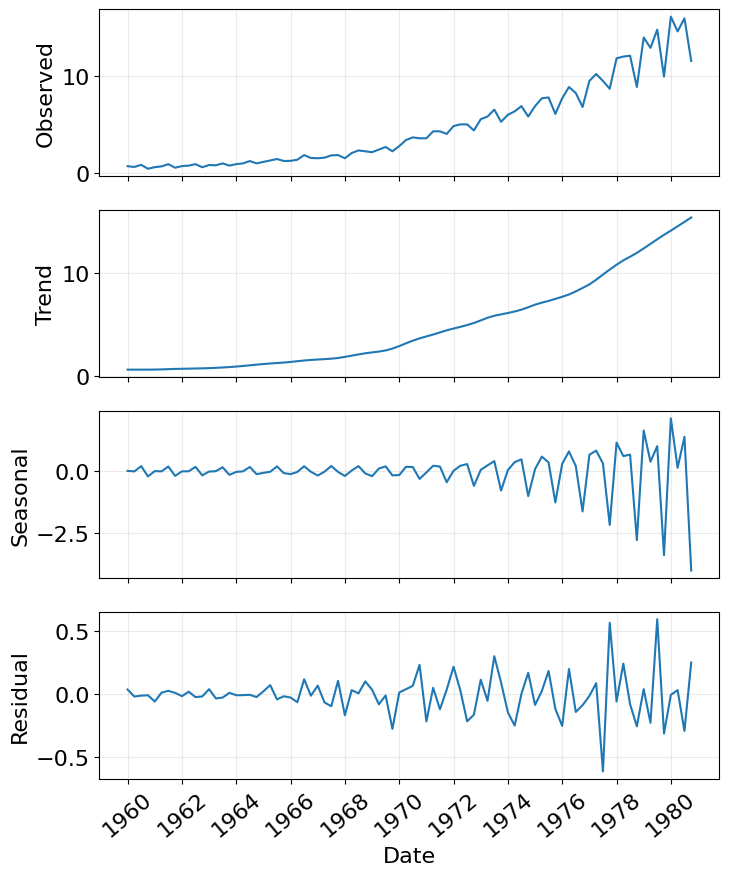

In [6]:
fig, axes = plt.subplots(nrows=4, figsize=(8, 10), sharex=True)

axes[0].plot(df["date"], advanced_decomposition.observed)
axes[1].plot(df["date"], advanced_decomposition.trend)
axes[2].plot(df["date"], advanced_decomposition.seasonal)
axes[3].plot(df["date"], advanced_decomposition.resid)

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator(base=2)
axes[3].xaxis.set_major_formatter(formatter)
axes[3].xaxis.set_major_locator(locator)
for label in axes[3].get_xticklabels():
  label.set_rotation(40)

axes[0].set_ylabel("Observed")
axes[1].set_ylabel("Trend")
axes[2].set_ylabel("Seasonal")
axes[3].set_ylabel("Residual")
axes[3].set_xlabel("Date")

for ax in axes:
  ax.grid("on")

plt.show(fig)

## 1.2 Bird's-eye view of time series forecasting

<img src="./figures/life-cycle-forecast.drawio.png" width=1000>     

**Figure 1.#** Forecasting project roadmap

Let us assume that you have a small street vendor (*warung* in Bahasa). You sell a cooked Indomie goreng for the customers
who come to your vendor. The vendor is located near the campus.
So mostly the buyers are college students. Because of highly
fluctuated the number of customers who come to your vendor, 
you want to estimate the number of Indomie packages that you
stock to avoid loss in revenue and excessive number of
expired package because of overstock number of Indomie goreng.

- Set a goal     
  You set a goal to estimate the number of Indomie packages
  for the whole next months.

- Determining what must be forecast to achieve your goal    
  You predict the number of Indomie goreng that is sold
  during a day before you closed the vendor.

- Setting the horizon of the forecast    
  The horizon is how long you should predict. You have
  to estimate the number of Indomie goreng package during a month.
  The horizon of your forecast is one month or 30 days.

- Gathering the data    
  Collect your data by counting the number of Indomie goreng
  that has been sold to the customer before you close the vendor
  in each day.   
  You might have to record at least a year or more to account
  the seasonality (e.g. a drop of customers during holiday)

- Developing a forecasting model  
  You can use SARIMA (to account seasonality) or 
  SARIMAX model (if you have more features to be accounted)

- Deploying to production      
  Deploy your model to estimate a whole month the number of
  estimated sold Indomie goreng. You can use web application
  to daily track the selling

- Monitoring    
  Compare the model when you are in the next month to the forecast. 
  At this point you can update the model to have more accuracy

- Collecting new data    
  Consistently gathering new data whenever feasible.

## 1.3 The difference time series forecasting to other regression tasks

- Time series have an order

- Time series sometimes do not have features